In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import sys
from dask.distributed import Client

In [4]:
c = Client()
c

Client Scheduler: tcp://127.0.0.1:53351 Dashboard: http://127.0.0.1:8787,Cluster Workers: 16 Cores: 16 Memory: 101.38 GB


In [38]:
grd2_path = os.path.join(os.environ.get('rawdir'),'gdata','waom_frc','waom2_grd.nc')
grd2 = xr.open_dataset(grd2_path)

rst2_path = os.path.join(os.environ.get('rawdir'),'waom2','ocean_rst.nc')
rst2 = xr.open_mfdataset(rst2_path).squeeze()

In [30]:
rst2.ubar

<xarray.DataArray 'ubar' (three: 3, eta_u: 2650, xi_u: 3149)>
dask.array<shape=(3, 2650, 3149), dtype=float64, chunksize=(3, 2650, 3149)>
Coordinates:
    x_u         (eta_u, xi_u) float64 dask.array<shape=(2650, 3149), chunksize=(2650, 3149)>
    y_u         (eta_u, xi_u) float64 dask.array<shape=(2650, 3149), chunksize=(2650, 3149)>
    ocean_time  datetime64[ns] 2014-01-25T11:27:00
Dimensions without coordinates: three, eta_u, xi_u
Attributes:
    long_name:  vertically integrated u-momentum component
    units:      meter second-1
    time:       ocean_time
    field:      ubar-velocity, scalar, series

<IPython.core.display.Javascript object>


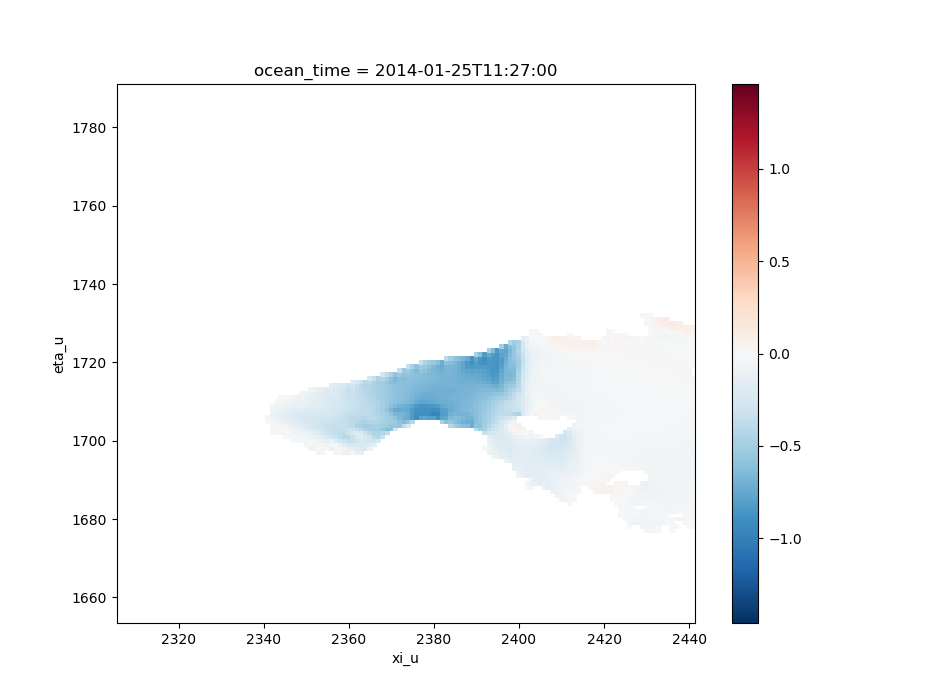

In [47]:
%matplotlib notebook
plt.close()
rst2.ubar.isel(three=2).where(grd2.mask_u).plot(size=7)
plt.show()

<IPython.core.display.Javascript object>


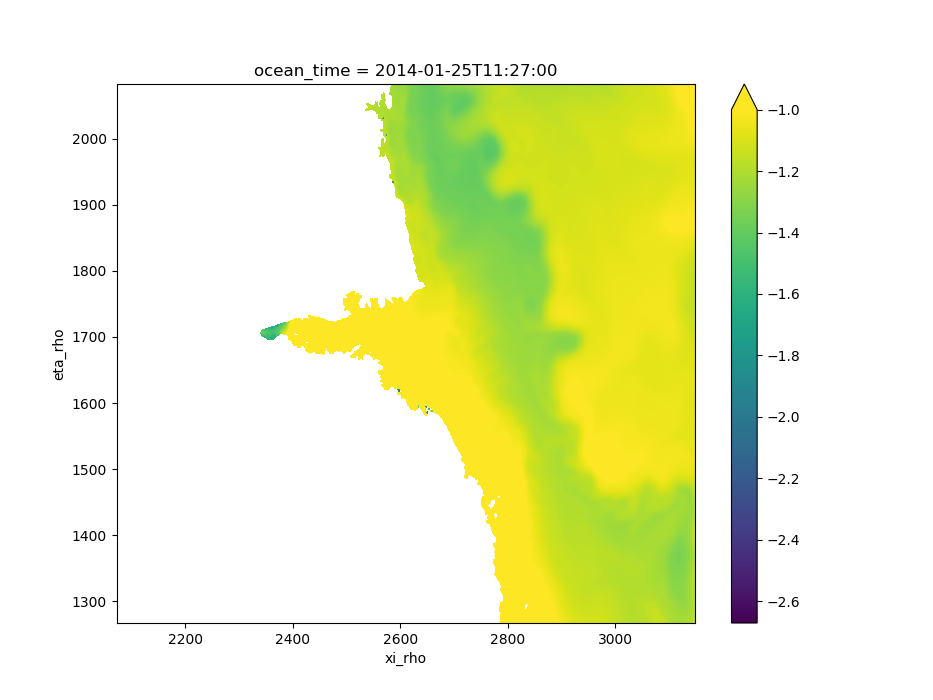

In [48]:
plt.close()
rst2.zeta.isel(three=2).where(grd2.mask_rho).plot(size=7,vmax=-1)
plt.show()

<IPython.core.display.Javascript object>


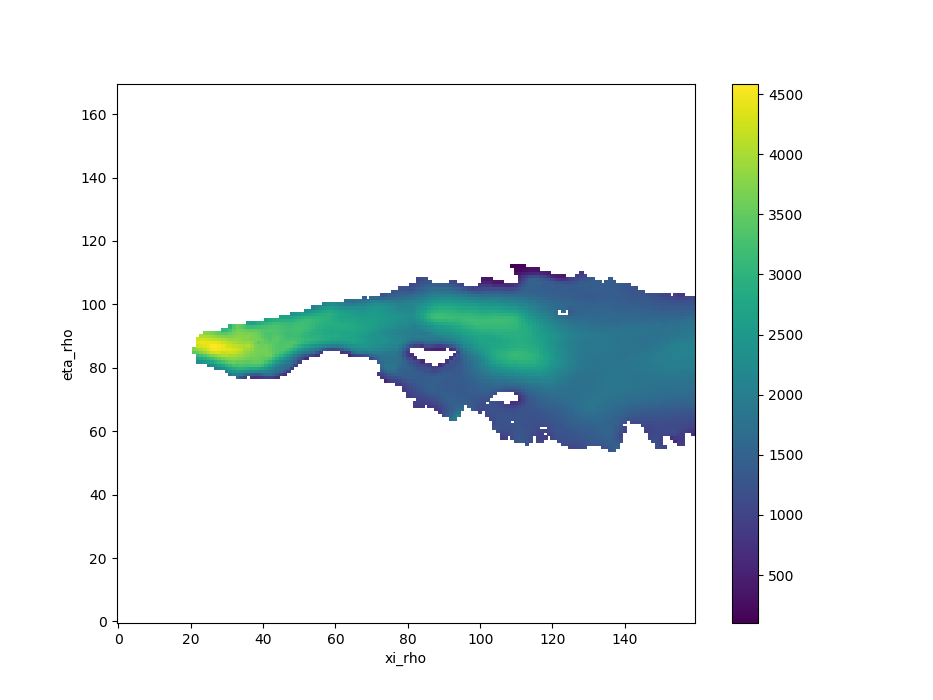

In [41]:
plt.close()
(grd2.h-grd2.zice).where(grd2.mask_rho).isel(eta_rho=slice(1620,1790),xi_rho=slice(2320,2480)).plot(size=7)
plt.show()

<IPython.core.display.Javascript object>


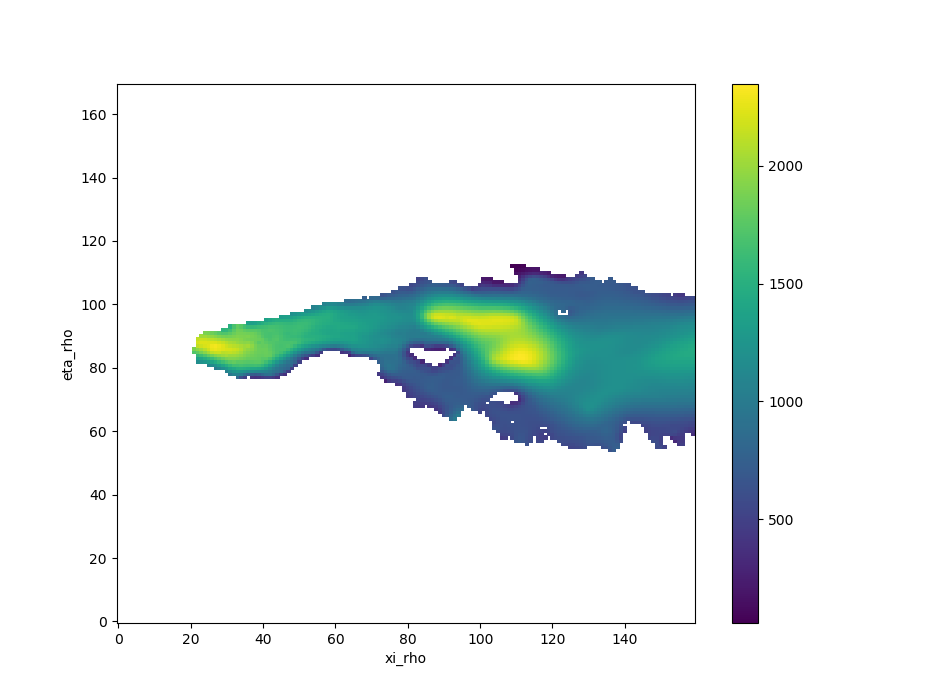

In [42]:
plt.close()
(grd2.h).where(grd2.mask_rho).isel(eta_rho=slice(1620,1790),xi_rho=slice(2320,2480)).plot(size=7)
plt.show()

<IPython.core.display.Javascript object>


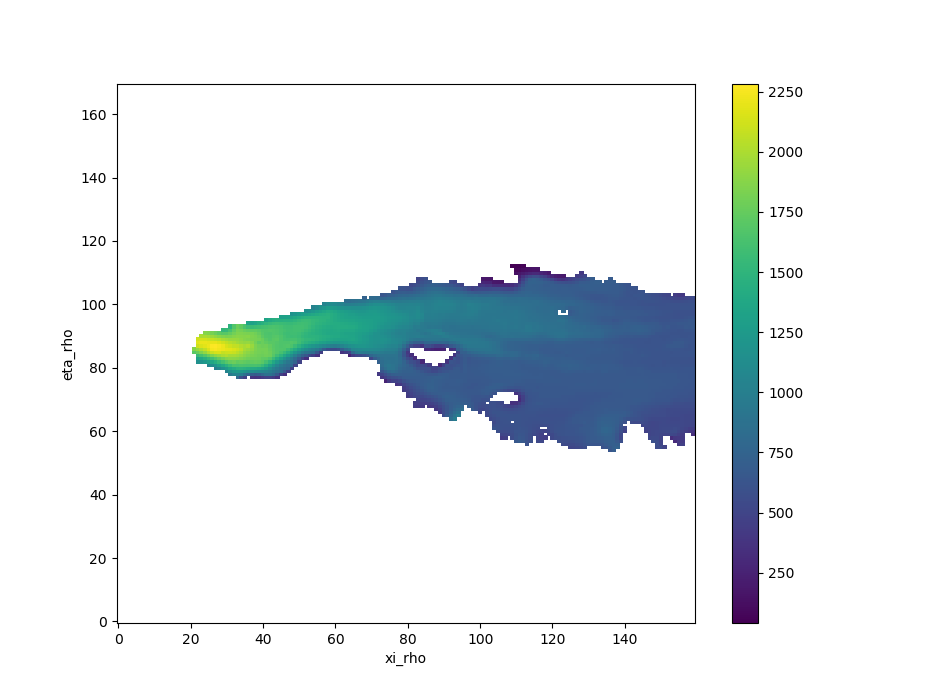

In [44]:
plt.close()
(-grd2.zice).where(grd2.mask_rho).isel(eta_rho=slice(1620,1790),xi_rho=slice(2320,2480)).plot(size=7)
plt.show()